# Урок 7

## Задание 2.

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [2]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

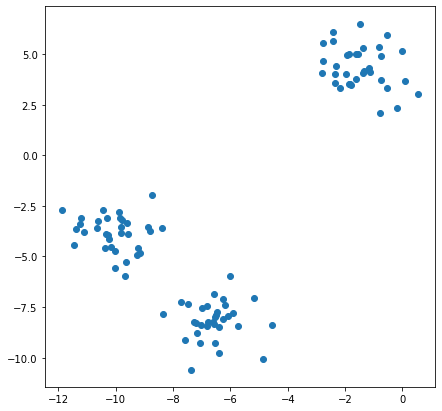

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние. 

In [4]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [5]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [6]:
def kmeans_predict(centroids, data):    
    # инициализируем центроиды как первые k элементов датасета
    classes = [i for i in range(len(centroids))]
    label = []
    # классифицируем объекты по центроидам
    for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            #print(classification)
            label.append(classification)
    return label

Напишем функцию для визуализации кластеров

In [7]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.grid(True)        
    plt.show()

In [8]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Напишем функцию вычисления метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние

In [9]:
def clustering_quality_metric(cluster):
    square_distances = [e_metrics(p1, p2)**2 for p1, p2 in combinations(cluster, 2)]

    return sum(square_distances) / len(square_distances)

Проверим результат алгоритма после одной итерации

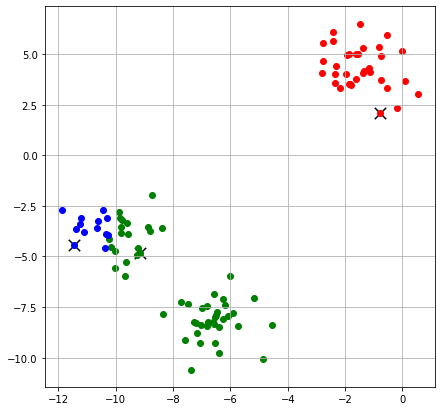

In [10]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Проверим работу алгоритма при различном числе итераций.

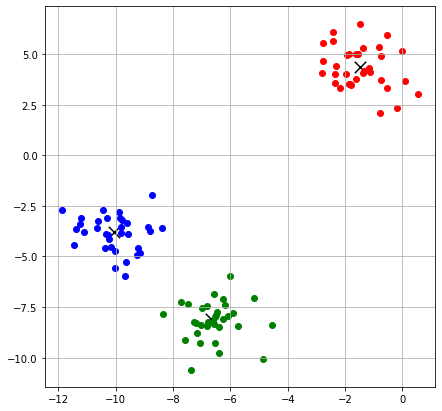

In [11]:
max_iterations = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [12]:
from itertools import combinations



In [13]:
type(clusters[0][1])

numpy.ndarray

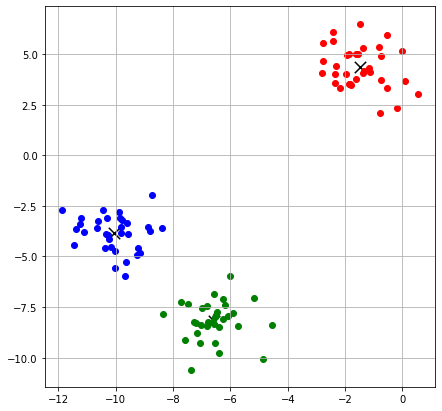

In [14]:
max_iterations = 5

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

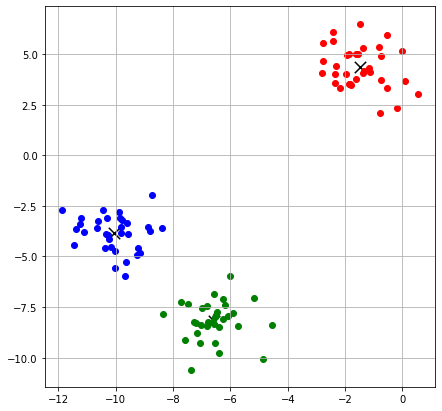

In [15]:
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Видно, как при увеличении количества итераций центроиды перемещаются в центр образующихся кластеров.

In [16]:
def get_clast( h = 0.2,xminmax = [], yminmax=[], centroids =[]):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF','#000AFF','#A00AFF','#BB0AFF'])

    # Расчет пределов графика
    xx, yy = np.meshgrid(np.arange(xminmax[0], xminmax[1], h), np.arange(yminmax[0], yminmax[1], h))

    # Получим предсказания для всех точек
    Z =  kmeans_predict(centroids, np.c_[xx.ravel(), yy.ravel()])

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    for centroid in centroids:
            plt.plot(centroid[0], centroid[1],'xk')
    

    # Добавим на график обучающую выборку
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("кластеризация  ")
    plt.show()

C:\Users\YURYEV~1\AppData\Local\Temp/ipykernel_8796/2673670281.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


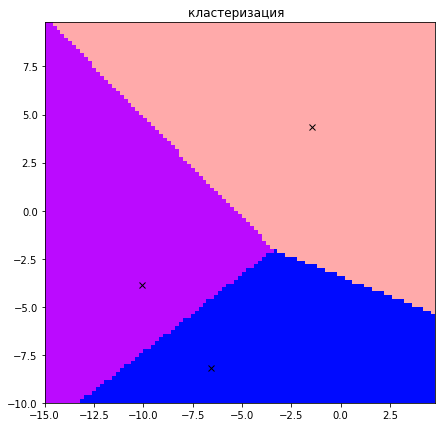

In [17]:
get_clast( h = 0.2,xminmax = [-15,5], yminmax=[-10,10], centroids =centroids)

Вычислим метрику качества кластеризации и построим график для разных k

In [18]:
max_k = 11
avg_q_m = []

for k in range(1,max_k):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)    

    clustering_quality_metrics = [clustering_quality_metric(clusters[i]) for i in clusters.keys()]
    avg_q_m.append(sum(clustering_quality_metrics)/k)

print(avg_q_m)

[83.19502581221147, 11.075664111511076, 3.2179064076975137, 2.518466124203024, 1.986104971137981, 2.126303913541743, 1.7733943640281926, 1.608220091884682, 1.512224701321486, 1.3351112294960998]


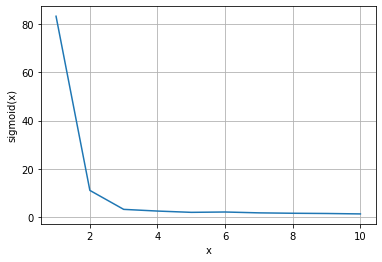

In [19]:
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(range(1,max_k), avg_q_m)

Мы видим, что для k = 3 метрика качества выходит на стабильное значение.